# Zillow EDA Data<a id='5_Modeling'></a>


The goal on this notebook is to obtain more insight on the information gathered and use it to properly predict house prices in the Phoenix, AZ. 

With this model we will analyze features on the housing market assuming prices are set by a free market and that customers demand favors some features more than others. The data we are going to use is "ZillowCompleteSingleFam.csv" which contains data from the housing market for single family homes for the entire USA. 

In [106]:
#Importing modules needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sn

In [40]:
# Importing data

ZillowData = pd.read_csv('../Capstone_2/ZillowCompleteSingleFam.csv')
ZillowData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518791 entries, 0 to 518790
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Unnamed: 0                                              518791 non-null  int64  
 1   Date                                                    518791 non-null  object 
 2   RegionName                                              518791 non-null  int64  
 3   DaysOnZillow_AllHomes                                   518791 non-null  float64
 4   InventoryRaw_AllHomes                                   518791 non-null  float64
 5   MedianListingPricePerSqft_1Bedroom                      518791 non-null  float64
 6   MedianListingPricePerSqft_2Bedroom                      518791 non-null  float64
 7   MedianListingPricePerSqft_3Bedroom                      518791 non-null  float64
 8   MedianListingPricePerSqf

In [41]:
ZillowData.head()

,Unnamed: 0,Date,RegionName,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Year,CountyName,StateName
0,0,1996-04-30,10001,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Kent,Delaware
1,1,1996-04-30,10003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,New Castle,Delaware
2,2,1996-04-30,1003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Baldwin,Alabama
3,3,1996-04-30,1009,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Blount,Alabama
4,4,1996-04-30,1017,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Chambers,Alabama


In [42]:
# Removing the 'Unnamed: 0' column since we already set up the date as index
ZillowData.drop('Unnamed: 0', axis=1, inplace=True)

# Exploring the Data<a id='5_Modeling'></a>


###  Comparing AZ to all other states

Before going deeply into the data we are going to look at some high level comparison between AZ and the remaining of the States, hopefuly we see something interesting.

In [43]:
# Creating a variable for AZ data and another for all other States 
Az_ZillowData = ZillowData[(ZillowData.StateName == "Arizona")]
AllStates_ZillowData = ZillowData[(ZillowData.StateName != "Arizona")]


#### How fast does houses sell in AZ? Lets compare the AVG days on Zillow and graphh it to get a better idea.<a id='3.5.1.2_Total_state_population'></a>

In [44]:
# Days on Zillow
AllStates_DoZ = AllStates_ZillowData[['Year','DaysOnZillow_AllHomes']].groupby(['Year'])['DaysOnZillow_AllHomes'].mean()
AZ_DoZ = Az_ZillowData[['Year','DaysOnZillow_AllHomes']].groupby(['Year'])['DaysOnZillow_AllHomes'].mean()

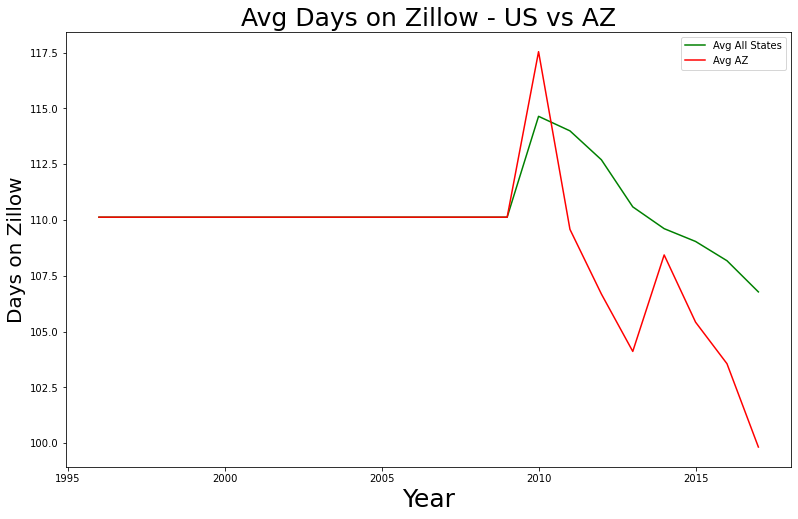

In [45]:
plt.figure(figsize=(13, 8))
plt.plot(AllStates_DoZ, color='g', label='Avg All States')
plt.plot(AZ_DoZ, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Days on Zillow',fontsize = 20)
plt.title('Avg Days on Zillow - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

In [46]:
# Overall avg for all states
Avg_DoZ = ZillowData[['StateName','DaysOnZillow_AllHomes']].groupby(['StateName'])['DaysOnZillow_AllHomes'].mean().to_frame('Avg Days on Zillow')
Avg_DoZ.sort_values(by=['Avg Days on Zillow'], ascending=True).reset_index().head(8)


,StateName,Avg Days on Zillow
0,District of Columbia,97.842811
1,California,103.376530
2,Colorado,107.480570
3,Utah,108.138451
4,Nevada,108.544469
5,Washington,108.623840
6,Oregon,108.743703
7,Arizona,108.918079


Overall AZ has a lower days on market than the nation average, and when we compare state by state, its ranked 44th - just above Oregon, Washington, Nevada, Utah, Colardo, California, and District of Columbia

#### How much inventory do we have in AZ? What would be the AVG of all the other states?.<a id='3.5.1.2_Total_state_population'></a>

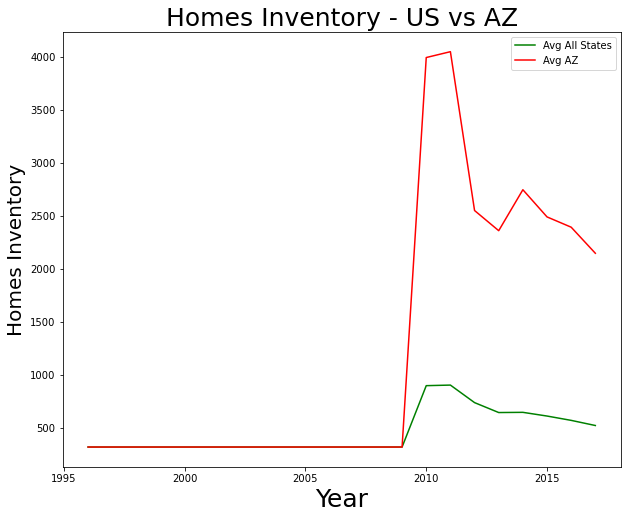

In [47]:
#Inventory all homes on market 

AllStates_Invt = AllStates_ZillowData[['Year','InventoryRaw_AllHomes']].groupby(['Year'])['InventoryRaw_AllHomes'].mean()
AZ_Invt = Az_ZillowData[['Year','InventoryRaw_AllHomes']].groupby(['Year'])['InventoryRaw_AllHomes'].mean()

plt.figure(figsize=(10, 8))
plt.plot(AllStates_Invt, color='g', label='Avg All States')
plt.plot(AZ_Invt, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Homes Inventory',fontsize = 20)
plt.title('Homes Inventory - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

AZ seems to have at least 4x more Home inventory than the nation average between the period of 2008 - 2012. Remember that this is when the house market crash and AZ was one of the states in which home values decresed as much as 50%!
This could be one of the reasons why the prices dropped so much back then.

In [48]:
Most_HomeInvt = ZillowData[['StateName','InventoryRaw_AllHomes']].groupby(['StateName'])['InventoryRaw_AllHomes'].mean().to_frame('Home Inventory')
Most_HomeInvt.sort_values(by=['Home Inventory'], ascending=False).head(5).reset_index()

,StateName,Home Inventory
0,Connecticut,1338.113027
1,Delaware,1299.527508
2,Florida,1270.980431
3,Arizona,1261.287858
4,New Jersey,1246.234446


It seems that AZ has been a hot market for the past few years, its where houses spend less time on the market and there seems to be a lot of inventory to choose from. 

#### How much inventory has had price reduction in AZ vs the remaining States?.<a id='3.5.1.2_Total_state_population'></a>

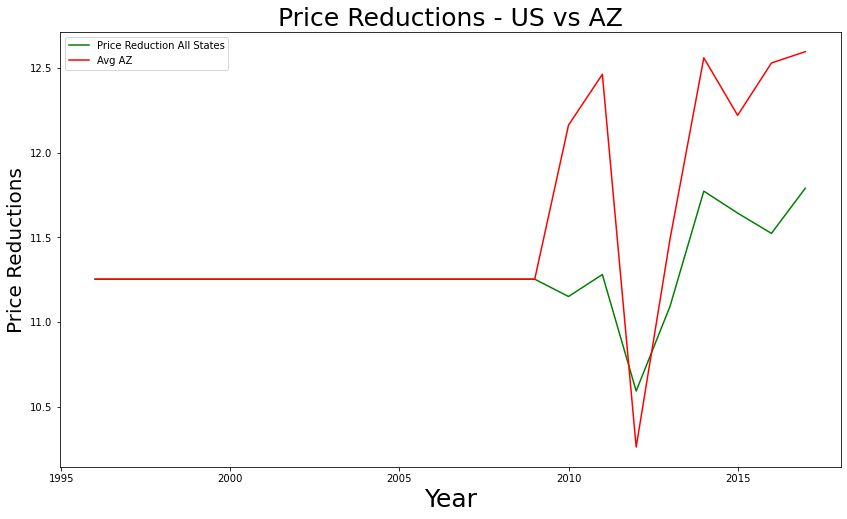

In [49]:
# Price decrease 

AllStates_PriceReduction = AllStates_ZillowData[['Year','PctOfListingsWithPriceReductions_AllHomes']].groupby(['Year'])['PctOfListingsWithPriceReductions_AllHomes'].mean()
AZ_PriceReduction = Az_ZillowData[['Year','PctOfListingsWithPriceReductions_AllHomes']].groupby(['Year'])['PctOfListingsWithPriceReductions_AllHomes'].mean()

plt.figure(figsize=(14, 8))
plt.plot(AllStates_PriceReduction, color='g', label='Price Reduction All States')
plt.plot(AZ_PriceReduction, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Price Reductions',fontsize = 20)
plt.title('Price Reductions - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

There seems to be a correlation between a reduction in prices whenever there is a a hugh increase in inventory.

#### How much inventory has had price reduction in AZ vs the remaining States?.<a id='3.5.1.2_Total_state_population'></a>


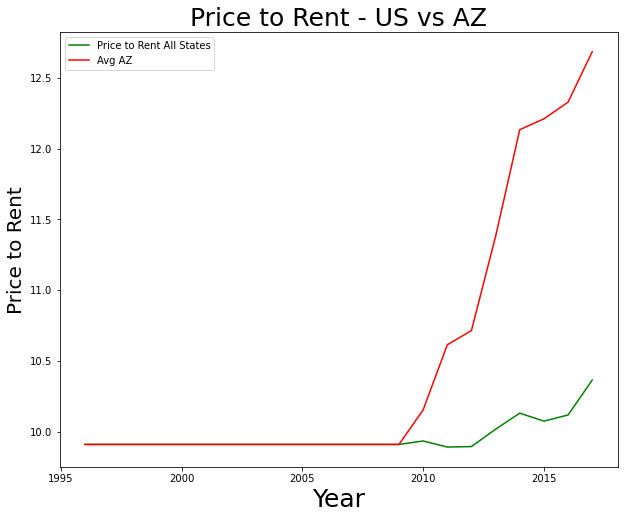

In [50]:
# Price to rent ratio 

AllStates_PriceToRent = AllStates_ZillowData[['Year','PriceToRentRatio_AllHomes']].groupby(['Year'])['PriceToRentRatio_AllHomes'].mean()
AZ_PriceToRent = Az_ZillowData[['Year','PriceToRentRatio_AllHomes']].groupby(['Year'])['PriceToRentRatio_AllHomes'].mean()

plt.figure(figsize=(10, 8))
plt.plot(AllStates_PriceToRent, color='g', label='Price to Rent All States')
plt.plot(AZ_PriceToRent, color='r', label='Avg AZ')
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Price to Rent',fontsize = 20)
plt.title('Price to Rent - US vs AZ',fontsize = 25)
plt.legend()
plt.show()

The price to rent ration is an indicator to whether housing markets are properly valued. The higher the ratio is the better is to rent than to buy. As we can see in AZ the ratio has been going up since about 2008 -our last housing bouble- and when you compare to the nation average it makes sense that AZ was one of the states that was hit the hardests.

# PCA Analysis <a id='5_Modeling'></a>


So far we have some useful insights using summary staticsts and we can infer some trends/correlations with the data. 
Unfortunatley, this does not help us to understand how much each of our feauters explacin the variance in prices, so we are going to move forward and create a principle componets analysis or PCA. This will help us to understand which variables really affect our variance and which do not.

#### Scale the data<a id='3.5.3.1_Scale_the_data'></a>

We need to only take numeric data, so all the none numeric columns will be added to the index, to avoid missing information later on.

In [51]:
# Data type needs to be the same as other columns to be able to concatenate and save all additional fields as indexes
ZillowData['RegionName'].dtypes

dtype('int64')

In [52]:
ZillowData['RegionName'] = ZillowData['RegionName'].astype(str)

In [53]:
# We only need numeric values for scaling, so we will concatenate and save non-numeric values into a new column
# and we are going to add these non numeric values as the indexes and drop their columns so that our df only contains
# numeric values
ZillowData['CountyName-StateName-RegionName-Date']= ZillowData['CountyName']+ '-' + ZillowData['StateName'] + '-' + ZillowData['RegionName'] + '-' + ZillowData['Date'].astype(str)
ZillowData_scale = ZillowData.set_index('CountyName-StateName-RegionName-Date').drop(['CountyName', 'StateName', 'RegionName', 'Date'], axis=1)

In [56]:
# We need to keep records of our columns and non-numeric data(our index)
ZillowData_columns = ZillowData_scale.columns
ZillowData_index = ZillowData_scale.index


In [62]:
ZillowData_scale.head()

,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,...,MedianPctOfPriceReduction_SingleFamilyResidence,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Year
CountyName-StateName-RegionName-Date,,,,,,,,,,,,,,,,,,,,,
Kent-Delaware-10001-1996-04-30,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,95.0,159450.0,...,4.198062,32.16,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996
New Castle-Delaware-10003-1996-04-30,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,95.0,159450.0,...,4.198062,32.16,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996
Baldwin-Alabama-1003-1996-04-30,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,95.0,159450.0,...,4.198062,32.16,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996
Blount-Alabama-1009-1996-04-30,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,95.0,159450.0,...,4.198062,32.16,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996
Chambers-Alabama-1017-1996-04-30,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,95.0,159450.0,...,4.198062,32.16,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996


The above sample shows what we expect: the columns we want are all numeric and the non-numeric values have been moved to the index.
Now we can move forward and scale our data using the 'Scale' function

In [64]:
# scaling the data, we will take the ZillowData_columns df created before since this only contains numeric values

ZillowData_scale = scale(ZillowData_scale)
ZillowData_scale.shape


(518791, 26)

In [65]:
# new data frame with scaled data

ZillowData_scale_df = pd.DataFrame(ZillowData_scale, columns=ZillowData_columns)
ZillowData_scale_df.head()

,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,...,MedianPctOfPriceReduction_SingleFamilyResidence,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Year
0,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107,-1.908141
1,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107,-1.908141
2,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107,-1.908141
3,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107,-1.908141
4,-0.022633,-0.165696,-0.040893,-0.068616,-0.100461,-0.072688,-0.053784,-0.129224,-0.130176,-0.03266,...,-0.093809,-0.115478,0.063483,0.013378,-0.013378,-0.026079,-0.02745,-0.056328,-0.102107,-1.908141


In [66]:
# for sanity check we will perform a few basic calculations to check scaling was done properly
# checking the mean
ZillowData_scale_df.mean()

DaysOnZillow_AllHomes                                     2.435043e-13
InventoryRaw_AllHomes                                    -4.818701e-14
MedianListingPricePerSqft_1Bedroom                        2.975434e-13
MedianListingPricePerSqft_2Bedroom                        1.286447e-13
MedianListingPricePerSqft_3Bedroom                        2.782364e-13
MedianListingPricePerSqft_4Bedroom                       -2.061546e-13
MedianListingPricePerSqft_5BedroomOrMore                 -1.575380e-13
MedianListingPricePerSqft_AllHomes                       -2.001658e-13
MedianListingPricePerSqft_SingleFamilyResidence          -3.293868e-13
MedianListingPrice_1Bedroom                              -2.063725e-13
MedianListingPrice_2Bedroom                               2.605737e-13
MedianListingPrice_3Bedroom                               4.663458e-13
MedianListingPrice_4Bedroom                              -2.673293e-13
MedianListingPrice_5BedroomOrMore                        -3.596436e-13
Median

In [67]:
# checking the std
ZillowData_scale_df.std(ddof=0)

DaysOnZillow_AllHomes                                     1.0
InventoryRaw_AllHomes                                     1.0
MedianListingPricePerSqft_1Bedroom                        1.0
MedianListingPricePerSqft_2Bedroom                        1.0
MedianListingPricePerSqft_3Bedroom                        1.0
MedianListingPricePerSqft_4Bedroom                        1.0
MedianListingPricePerSqft_5BedroomOrMore                  1.0
MedianListingPricePerSqft_AllHomes                        1.0
MedianListingPricePerSqft_SingleFamilyResidence           1.0
MedianListingPrice_1Bedroom                               1.0
MedianListingPrice_2Bedroom                               1.0
MedianListingPrice_3Bedroom                               1.0
MedianListingPrice_4Bedroom                               1.0
MedianListingPrice_5BedroomOrMore                         1.0
MedianListingPrice_AllHomes                               1.0
MedianPctOfPriceReduction_AllHomes                        1.0
MedianPc

#### Calculating PCA <a id='3.5.3.1_Scale_the_data'></a>

Now that we have confirmed that scaling was done properly, we will move forward and fit and transform and df. 

In [68]:
# We Fit the PCA transformation using the scaled data.
zillow_pca = PCA().fit(ZillowData_scale_df)


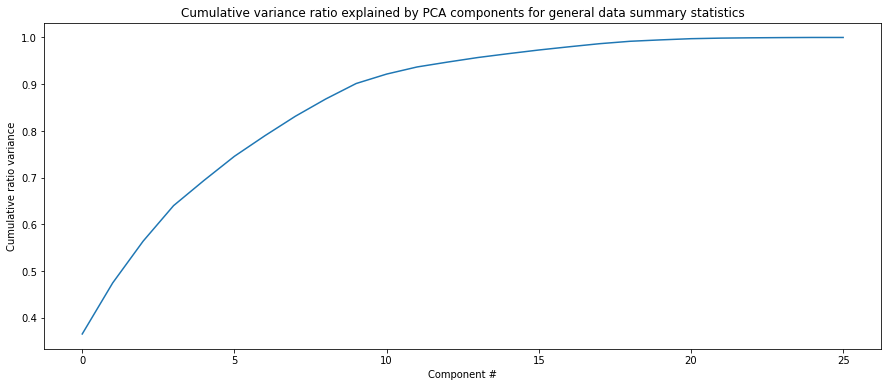

In [69]:
# Now we will plot the cumulative ratio with number of components.

plt.subplots(figsize=(15, 6))
plt.plot(zillow_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for general data summary statistics');

The first 5 components seem to account for over 70% of the variance, and the first 10 for over 90%.

In [129]:
# We are going to graph the top 9 components to confirm they explain over 90% of the variance.
explained_var_ratios = zillow_pca.explained_variance_ratio_
sorted_var_ratios = sorted(explained_var_ratios, reverse=True)

# Selecting top 10 components
top_components = sorted_var_ratios[:10]
total = sum(top_components)
total

0.9015058956959756

In [132]:
# Apply the transformation to the data to obtain the derived features, we will create a new variable sine we don't 
# want to manipulate our original data.

zillow_pca_x = zillow_pca.transform(ZillowData_scale_df)
zillow_pca_x.shape

(518791, 26)

In [ ]:
Now we are going to plot the first two components, which provide the highest explained variance ratio.

In [143]:
# We obtain the data of the first 2 components

x = zillow_pca_x[:, 0]
y = zillow_pca_x[:, 1]

# We sum the explained variance of both components
pc_var = 100 * zillow_pca.explained_variance_ratio_.cumsum()[1]


Text(0.5, 1.0, 'Gen Data summary PCA, 47.5% variance explained')

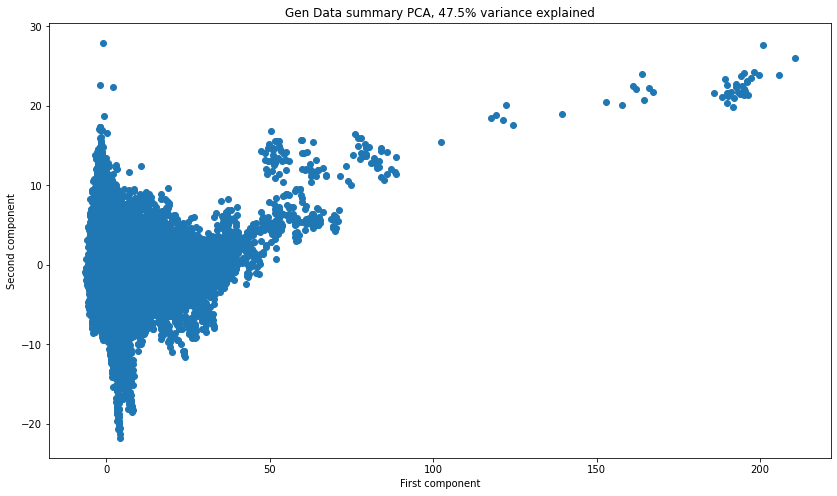

In [145]:
# Finally, we plot both components

plt.subplots(figsize=(14,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Gen Data summary PCA, {pc_var:.1f}% variance explained')


#####  Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>


Another way of viewing how our features interact is by plotting a heat map.
Below is a good example of the correlation our features have.

<AxesSubplot:>

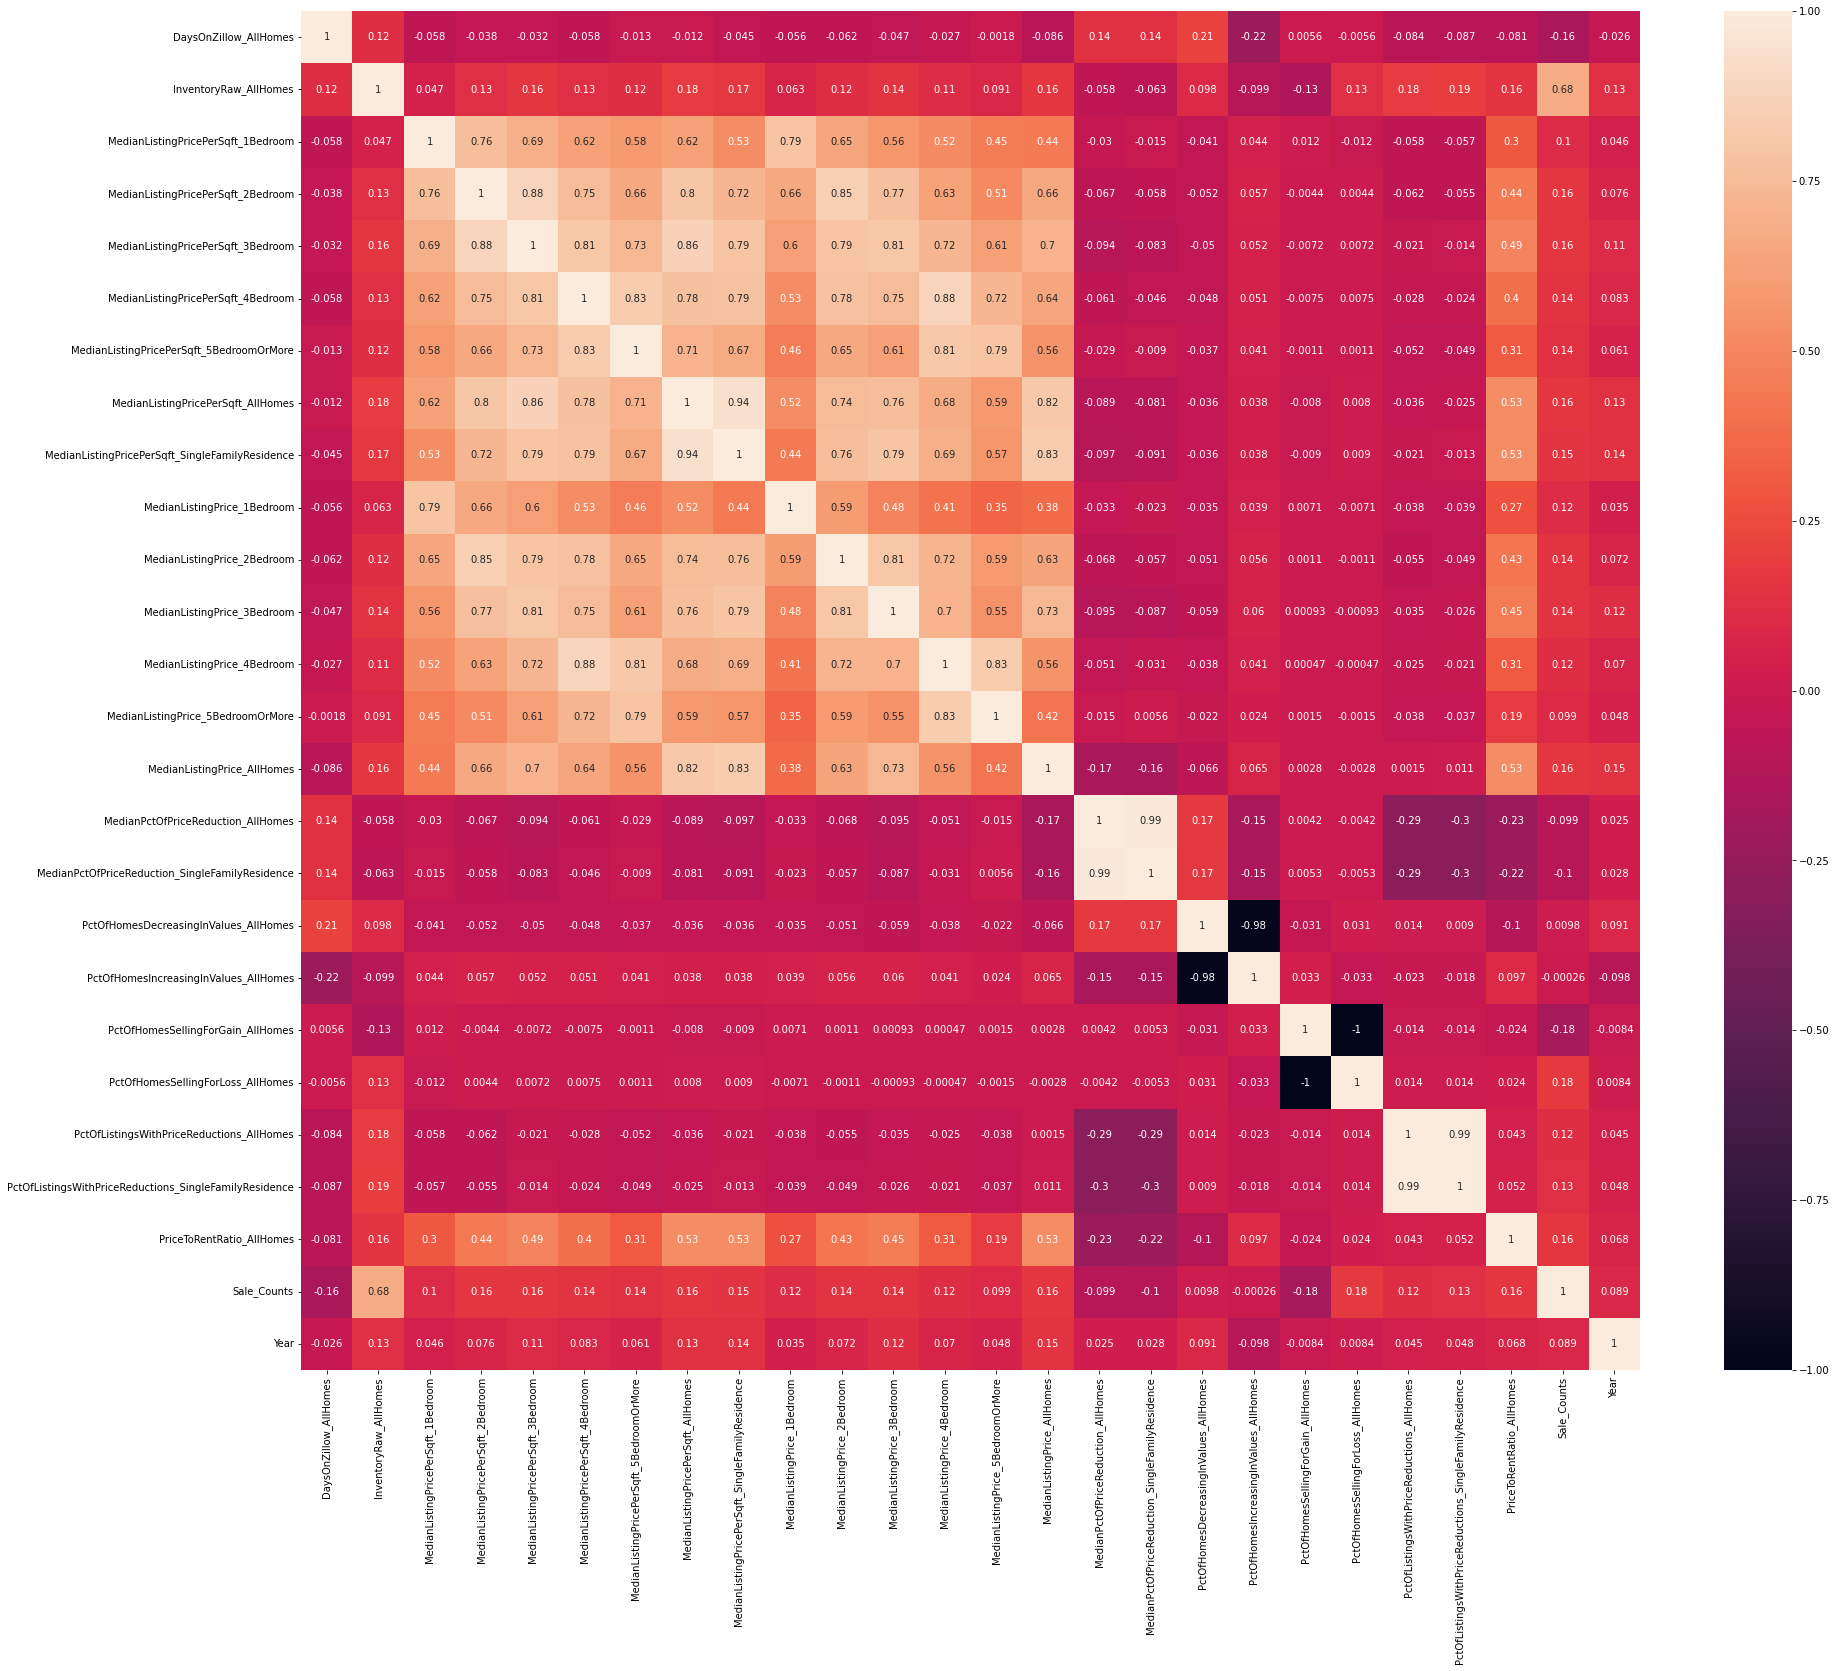

In [148]:
plt.figure(figsize=(30, 25))
sns.heatmap(ZillowData.corr(), annot=True)